# Question 2 of final assignment
## Packages needed

In [17]:
import numpy as np
import pandas as pd
import sklearn.datasets
import scipy.optimize
import matplotlib.pyplot as plt
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit,differential_evolution 
import warnings

# Function Definition

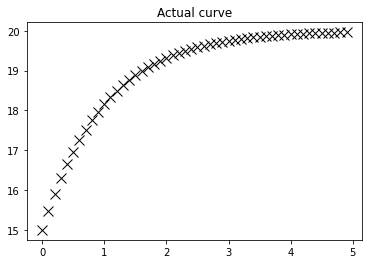

In [18]:
def Func(x, A1, A2, A3):
    return A1 + A2 * np.exp(-A3 * x)
#Lets assume these values to fit
a1,a2,a3=20,-5,1
p__s=np.array([i/10 for i in range(0,50,1)]);d__s=np.array([Func(i,a1,a2,a3) for i in p__s])
plt.plot(p__s, d__s, 'x',markersize=10,color='Black')
plt.title("Actual curve")
plt.show()
plt.close()

# Function Plot

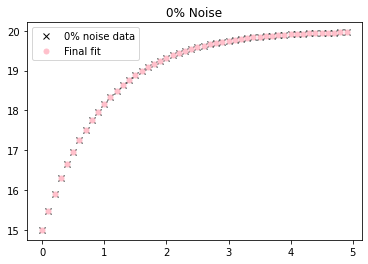

A1-B1: 0.0 A2-B2: 1.7763568394002505e-15 A3-B3 4.440892098500626e-16


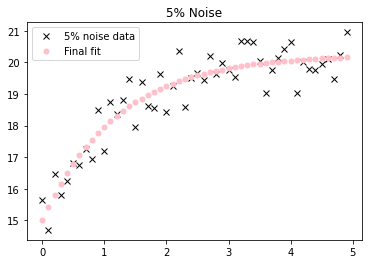

A1-B1: -0.2522424810304429 A2-B2: 0.24285934562713063 A3-B3 0.17299945421995866


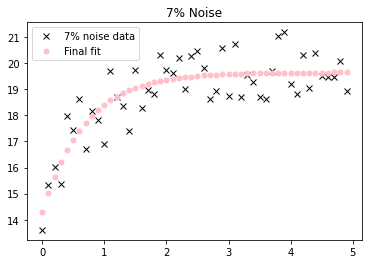

A1-B1: 0.3479266150268572 A2-B2: 0.347800301569956 A3-B3 -0.4558153693003102


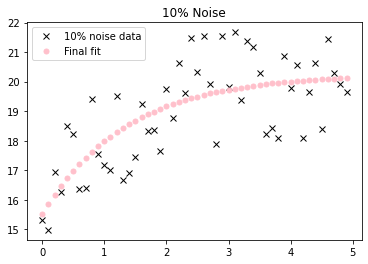

A1-B1: -0.25196197317588087 A2-B2: -0.27016563713578456 A3-B3 0.26678880331801935


In [19]:
A1, A2, A3 = (20,-5,1)
L1=[]
for i in [0,0.05,0.07,0.1]:
    Junk=np.random.uniform(-i*max(d__s),i*max(d__s),[50])
    final_y=d__s+Junk
    def Func_Err(parameterTuple):
        warnings.filterwarnings("ignore")
        val = Func(p__s, *parameterTuple)
        return numpy.sum((final_y - val) ** 2.0)
    def Starting_vals(x,y):
        X2,X1,Y2,Y1 = max(x),min(x),max(y),min(y)
        X2Y2 = max(X2, Y2)
        B_points = []
        B_points.append([-X2Y2, X2Y2]);B_points.append([-X2Y2, X2Y2]);B_points.append([-X2Y2, X2Y2]);
        Valoss = differential_evolution(Func_Err, B_points, seed=3)
        return Valoss.x
    Inits_det = Starting_vals(p__s,final_y)
    pmst, cv = scipy.optimize.curve_fit(Func, p__s, final_y, Inits_det)
    B1, B2, B3 = pmst
    Highv,Highv_new = np.square(final_y - Func(p__s, B1, B2, B3)),np.square(final_y - np.mean(final_y))
    r_0 = 1 - np.sum(Highv) / np.sum(Highv_new)
    plt.plot(p__s, final_y, 'x', label=str(int(i*100))+"% noise data",color="Black")
    plt.plot(p__s, Func(p__s, B1,B2,B3), '.', label="Final fit",markersize=10,color="Pink")
    plt.title(str(int(i*100))+"%"+" Noise")
    plt.legend()
    plt.show()
    plt.close()
    L1.append([a1-B1,a2-B2,a3,B3])
    print("A1-B1:",a1-B1,"A2-B2:",a2-B2,"A3-B3",a3-B3)

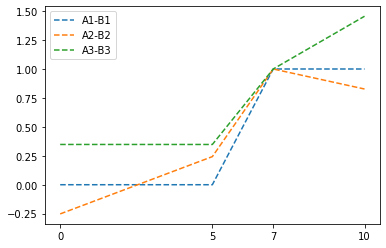

In [20]:
#plotting the differences w.r.t noise percentage
plt.plot([0,5,7,10], L1[0], '--', label="A1-B1")
plt.plot([0,5,7,10], L1[1], '--', label="A2-B2")
plt.plot([0,5,7,10], L1[2], '--', label="A3-B3")
plt.xticks([0,5,7,10])
plt.legend()
plt.show()

In [21]:
#It can be seen that the error/difference see an overall increase